In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/superstore-dataset-final/Sample - Superstore.csv


# **Importing Libraries**

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor 


# **Loading Data**

In [3]:
df=pd.read_csv('../input/superstore-dataset-final/Sample - Superstore.csv', encoding='windows-1252')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# **Columns**
*  Order ID : Unique Order ID for each Customer.
* Order Date : Order Date of the product.
* Ship Date : Shipping Date of the Product.
* Ship Mode : Shipping Mode specified by the Customer.
* Customer ID : Unique ID to identify each Customer.
* Customer Name : Name of the Customer.
* Segment : The segment where the Customer belongs.
* Country : Country of residence of the Customer.
* City : City of residence of of the Customer.
* State :  State of residence of the Customer.
* Postal Code : Postal Code of every Customer.
* Region : Region where the Customer belong.
* Product ID : Unique ID of the Product.
* Category : Category of the product ordered.
* Sub-Category : Sub-Category of the product ordered.
* Product Name : Name of the Product
* Sales : Sales of the Product.
* Quantity :  Quantity of the Product.
* Discount : Discount provided.
* Profit : Profit/Loss 


In [4]:
copy_df=df.copy()

# **Dimension of Data**

In [5]:
df.shape

(9994, 21)

* Data contains 9994 rows and 21 columns

# **Features of Data**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

# **Misssing Data**

In [7]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [8]:
df=df.set_index('Row ID')

In [9]:
df.duplicated().sum()

1

In [10]:
df.loc[df.duplicated(keep=False), :]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
3406,US-2014-150119,4/23/2014,4/27/2014,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588
3407,US-2014-150119,4/23/2014,4/27/2014,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [11]:
df=df.drop_duplicates()

In [12]:
df[['Order Date','Ship Date']] = df[['Order Date','Ship Date']].apply(pd.to_datetime) 
df['Days'] = (df['Ship Date'] - df['Order Date']).dt.days

<AxesSubplot:>

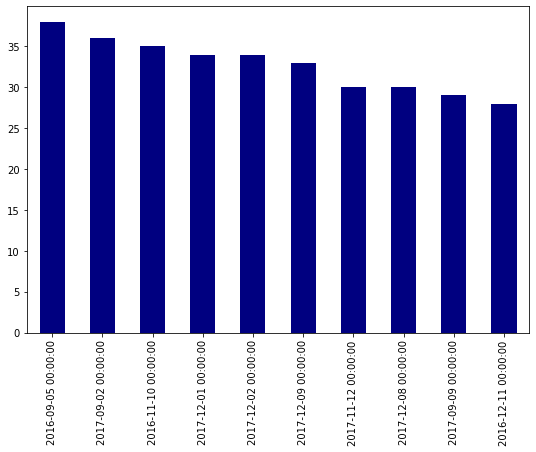

In [13]:
plt.figure(figsize=(9,6))
df['Order Date'].value_counts().nlargest(10).plot(kind='bar',cmap='gist_ncar')

<AxesSubplot:>

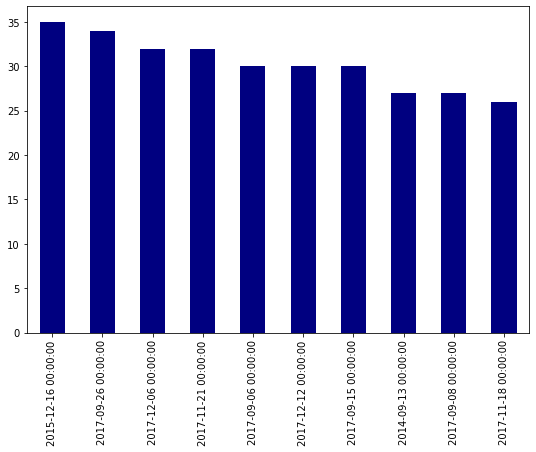

In [14]:
plt.figure(figsize=(9,6))
df['Ship Date'].value_counts().nlargest(10).plot(kind='bar',cmap='gist_ncar')

# Independent Variables (categorical)

<AxesSubplot:xlabel='count', ylabel='Ship Mode'>

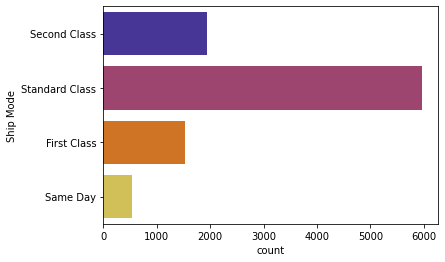

In [15]:
sns.countplot(y=df['Ship Mode'],palette='CMRmap')

* Shipping through Standard Class is used most.

<AxesSubplot:xlabel='count', ylabel='Category'>

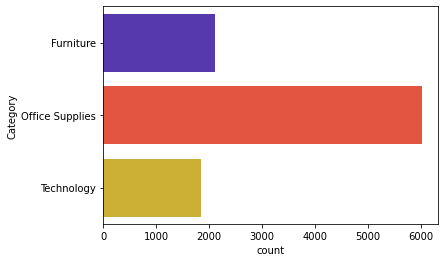

In [16]:
sns.countplot(y=df['Category'],palette='CMRmap')

* Most of ordered products belongs to Office Supplies category.

<AxesSubplot:xlabel='count', ylabel='Segment'>

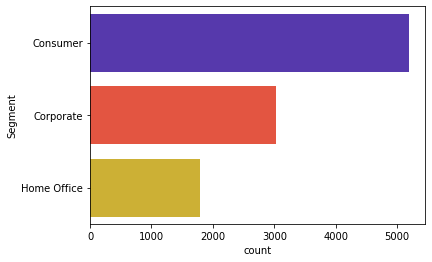

In [17]:
sns.countplot(y=df['Segment'],palette='CMRmap')

* Most Customers are of Consumer Types.

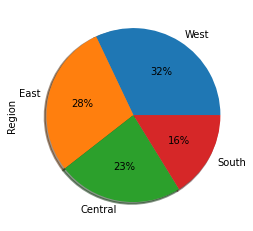

In [18]:
df['Region'].value_counts().plot.pie(autopct='%1.0f%%',shadow=True,wedgeprops = {'linewidth': 2})
plt.show()

* West region has more Customers than other regions.

<AxesSubplot:>

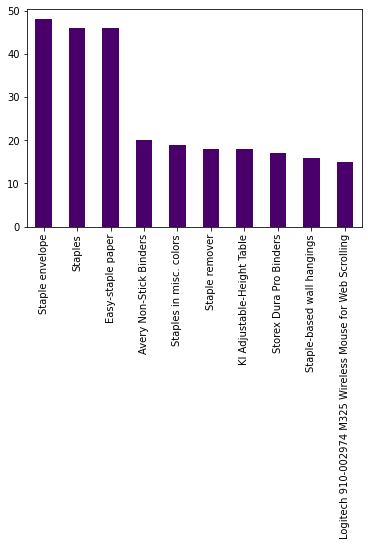

In [19]:
df['Product Name'].value_counts().nlargest(10).plot(kind='bar',cmap='RdPu_r')

* staple envelope  is most ordered product.

<AxesSubplot:>

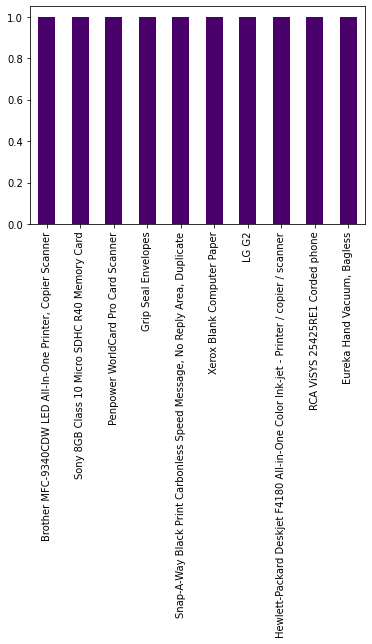

In [20]:
df['Product Name'].value_counts().nsmallest(10).plot(kind='bar',cmap='RdPu_r')

# Independent Columns (numeric)


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

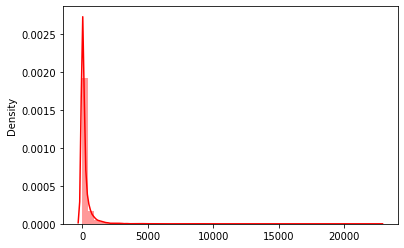

In [21]:
sns.distplot(x=df['Sales'],color='r')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

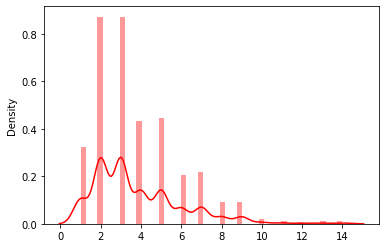

In [22]:
sns.distplot(x=df['Quantity'],color='r')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

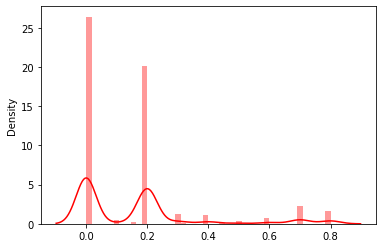

In [23]:
sns.distplot(x=df['Discount'],color='r')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

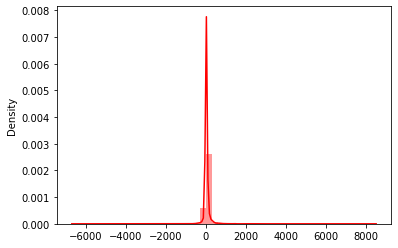

In [24]:
sns.distplot(x=df['Profit'],color='r')

# Target Variable vs Independent Variables

<AxesSubplot:xlabel='Profit', ylabel='Sales'>

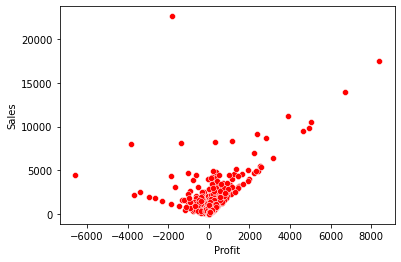

In [25]:
sns.scatterplot(x=df['Profit'],y=df['Sales'],color='r')

<AxesSubplot:xlabel='Profit', ylabel='Quantity'>

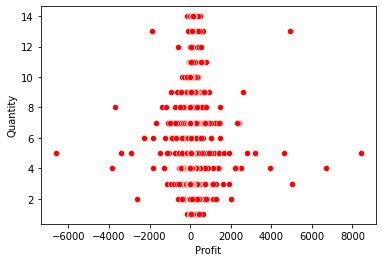

In [26]:
sns.scatterplot(x=df['Profit'],y=df['Quantity'],color='r')

<AxesSubplot:xlabel='Profit', ylabel='Discount'>

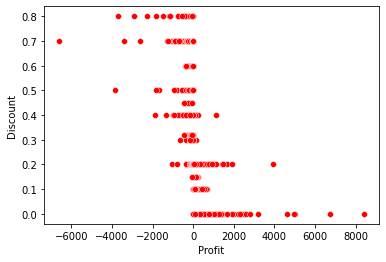

In [27]:
sns.scatterplot(x=df['Profit'],y=df['Discount'],color='r')

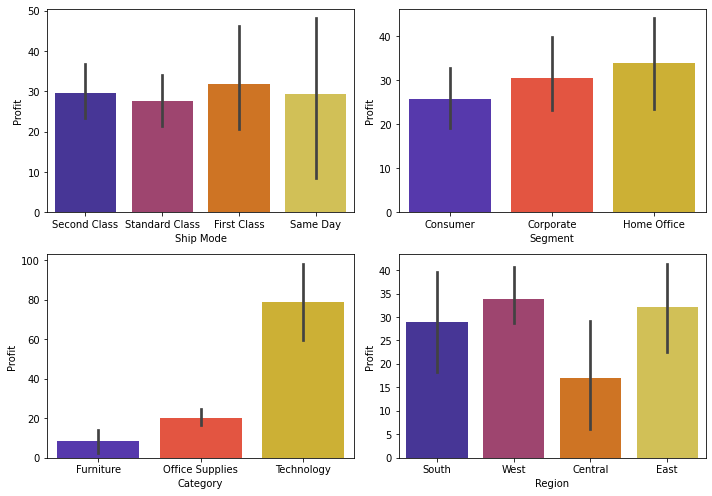

In [28]:
fig,axes=plt.subplots(2,2,figsize=(10,7))
sns.barplot(x=df['Ship Mode'],y=df['Profit'],palette='CMRmap',ax=axes[0,0])
sns.barplot(x=df['Segment'],y=df['Profit'],palette='CMRmap',ax=axes[0,1])
sns.barplot(x=df['Category'],y=df['Profit'],palette='CMRmap',ax=axes[1,0])
sns.barplot(x=df['Region'],y=df['Profit'],palette='CMRmap',ax=axes[1,1])
plt.tight_layout()
plt.subplots_adjust()

<AxesSubplot:xlabel='Customer Name,Product Name'>

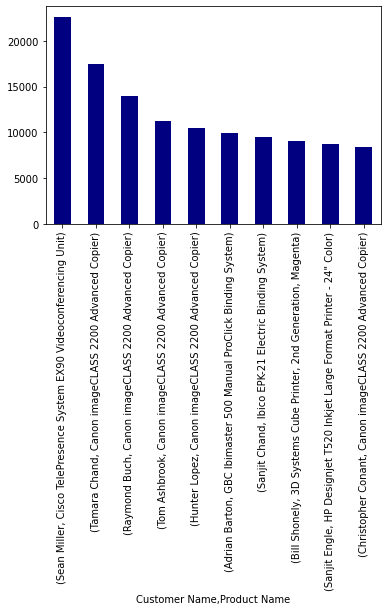

In [29]:
df.groupby(['Customer Name','Product Name'])['Sales'].sum().nlargest(10).plot(kind='bar',cmap='gist_ncar')

# Label Encoding

In [30]:
X= df.drop('Profit',axis=1)
Y= df['Profit']
X.shape,Y.shape

((9993, 20), (9993,))

In [31]:
X_enc = X.copy()
for col in X.columns:
    lb = LabelEncoder() 
    X_enc[col] = lb.fit_transform(X[col].values)
    
X_enc.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Days
Row ID,,,,,,,,,,,,,,,,,,,,
1,2500,864,929,2,143,166,0,0,194,15,217,2,12,0,4,386,4205,1,0,3
2,2500,864,929,2,143,166,0,0,194,15,217,2,55,0,5,839,5219,2,0,3
3,2296,732,787,2,237,201,1,0,266,3,517,3,946,1,10,1433,969,1,0,4
4,4372,519,568,3,705,687,0,0,153,8,170,2,319,0,16,366,5392,4,7,7
5,4372,519,568,3,705,687,0,0,153,8,170,2,1316,1,14,573,1360,1,3,7


In [32]:
X.shape, X_enc.shape

((9993, 20), (9993, 20))

# Train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_enc, Y)

In [34]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train ,y_train) ,lr.score(X_test ,y_test)


(0.08935263057301446, 0.06406207259309094)

In [35]:
model = KNeighborsRegressor(n_neighbors=8)
model.fit(X_train, y_train)
pred_y = model.predict(X_test)
model.score(X_test,y_test)

0.08739445594645878

In [36]:

X_train, X_test, y_train, y_test = train_test_split(X_enc, Y)
model = DecisionTreeRegressor(max_depth=8,min_samples_leaf=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test,y_test)

0.6625436224341519

In [37]:
model.score(X_train,y_train)

0.8008880566443495

In [38]:
model.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.14536383e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.65379534e-04, 7.37722962e-03, 6.14646042e-04, 0.00000000e+00,
       1.55805563e-02, 4.19775787e-04, 2.95283303e-02, 7.28712838e-04,
       7.32101623e-01, 1.25483689e-03, 2.09983546e-01, 0.00000000e+00])

In [39]:
feature_importance = pd.DataFrame({'importance': model.feature_importances_}, index= X.columns).sort_values('importance')
feature_importance

,importance
Order ID,0.000000
Region,0.000000
Country,0.000000
Segment,0.000000
Customer Name,0.000000
Days,0.000000
Ship Mode,0.000000
Ship Date,0.000000
Order Date,0.000000
City,0.000265


In [40]:
feature=feature_importance[feature_importance.importance >=0.01].index
x_enc_=X_enc[feature]


In [41]:
param_dist = {"max_depth": [3, None],
              "max_features": range(1, 11),
              "min_samples_split": range(2, 11),
              "criterion": ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']}

In [42]:
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(X_train, y_train)
random_search.score(X_train,y_train),random_search.score(X_test,y_test)

(0.7622900621891102, 0.6097400342132304)

In [43]:
# use a full grid over all parameters
param_grid = {"max_depth": [1,2,3],
              "max_features": [1,2,3,4],
              "min_samples_split": [ 3,4,5],"criterion": ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']}

In [44]:

X_train, X_test, y_train, y_test = train_test_split(X_enc[feature], Y)
model = DecisionTreeRegressor()
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)
# random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5)
grid_search.fit(X_train, y_train)
# y_pred = grid_search.predict(X_test)
print(grid_search.best_estimator_)
grid_search.score(X_train,y_train),grid_search.score(X_test,y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1320, in fit
    X_idx_sorted=X_idx_sorted,
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 179, in fit
    "Some value(s) of y are negative which is"
ValueError: Some value(s) of y are negative which is n

DecisionTreeRegressor(criterion='absolute_error', max_depth=3, max_features=4,
                      min_samples_split=3)


(0.6738121493767208, 0.4848119491024391)

In [45]:
reg=RandomForestRegressor(n_estimators=100,max_depth=7,random_state=5)
X_train, X_test, y_train, y_test = train_test_split(X_enc[feature], Y)
reg.fit(X_train, y_train)
reg.score(X_train,y_train),reg.score(X_test,y_test)

(0.9331598686566258, 0.7845984552802934)